In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#imports and paths
import numpy as np 
import pickle 
import matplotlib.pyplot as plt
from src import plotting
from  src import stats
path= 'data/jaw_images_mutant.pkl'

%matplotlib inline

In [3]:

f = open(path, "rb")
data = {}


In [4]:
while True:
    try:
        ji = pickle.load(f)
        data.update(ji)
    except EOFError:
        break
f.close()

data.keys()

dict_keys(['Col11a2 mutant 13', 'Col11a2 mutant 15', 'Col11a2 mutant 7', 'Col11a2 mutant 8', 'Col11a2 mutant 9', 'Control 1', 'Control 10', 'Control 11', 'Control 12', 'Control 13', 'Control 15', 'Control 16', 'Control 17', 'Control 18', 'Control 2', 'Control 20', 'Control 21', 'Control 22', 'Control 24', 'Control 25', 'Control 26', 'Control 27', 'Control 29', 'Control 3', 'Control 30', 'Control 31', 'Control 4', 'Control 5', 'Control 6', 'Control 7', 'Control 8', 'barx1 mutant 1', 'barx1 mutant 10', 'barx1 mutant 2', 'barx1 mutant 3', 'barx1 mutant 4', 'barx1 mutant 6', 'barx1 mutant 9', 'chsy1 mutant 10 ', 'chsy1 mutant 11', 'chsy1 mutant 12', 'chsy1 mutant 13', 'chsy1 mutant 14', 'chsy1 mutant 15', 'chsy1 mutant 16', 'chsy1 mutant 17', 'chsy1 mutant 3', 'chsy1 mutant 4', 'chsy1 mutant 5', 'chsy1 mutant 6', 'chsy1 mutant 7', 'chsy1 mutant 8 ', 'chsy1 mutant 9', 'col11a2 mutant 1', 'col11a2 mutant 3', 'col11a2 mutant 4', 'col11a2 mutant 5', 'col11a2 mutant new 12', 'col11a2 mutant new

In [57]:
sampler = stats.BallSampler(data['ncoa3 mutant 1'])

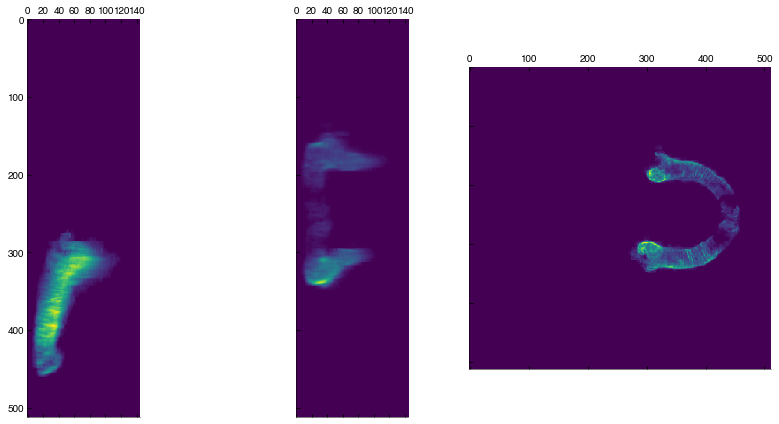

In [58]:
plotting.trisum(sampler.data)

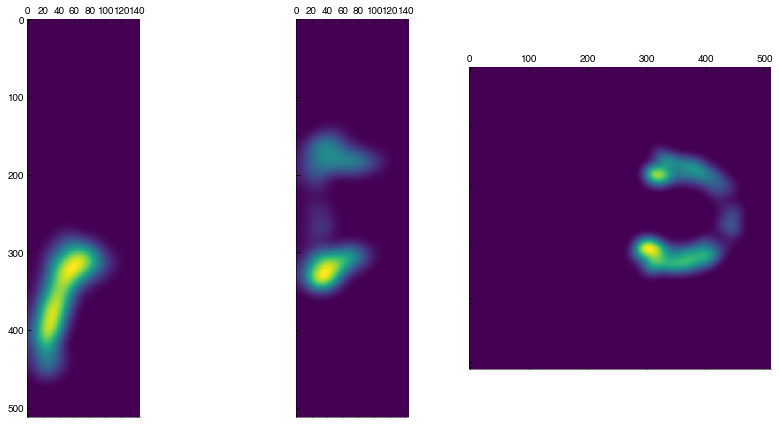

In [45]:
plotting.trisum(sampler)

In [50]:
sampler.sample(k=1,N=1000)

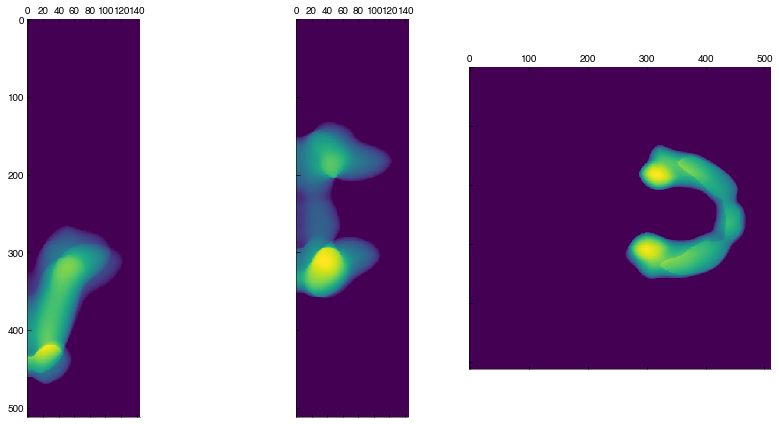

In [51]:
plotting.trisum(sampler.inner)

In [25]:
res = sampler.get_stat()

/Users/francesco/Repos/jaw-fluctuations/src/stats.py:9: RuntimeWarning: invalid value encountered in power
  return a*np.exp(-(x/b)**c)


[544.59022697   4.07068518   1.52089019]


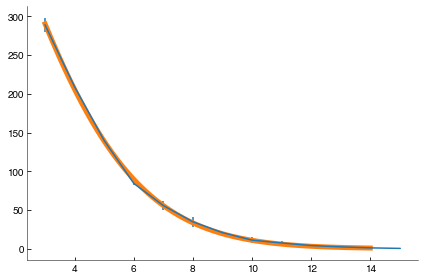

In [26]:
plt.errorbar(sampler.run_params['sizes'], res['avg_empty'], res['std_empty']);
x = np.linspace(3,14,1000)
plt.plot(x,res['fit']['model'](x,*res['fit']['popt']), lw=5)
print(res['fit']['popt'])

In [13]:
# loop over a few jaws:
scores = {}
picklefile = open('output/scores_mutant.pkl', 'ab+')
for name in list(data.keys()):
    sampler = stats.BallSampler(data[name])
    sampler.sample(k=5, N=1000)
    res = sampler.get_stat()
    print(name, res['fit']['popt'][1],res['fit']['pcov'][1,1],res['fit']['popt'][2])
    scores[name] = res
    pickle.dump(res,picklefile)
picklefile.close()

Col11a2 mutant 13 6.166592076945338 0.001666801798965658 2.065435021840852
Col11a2 mutant 15 6.562167255513484 0.010872896097023537 1.9250000573411974
Col11a2 mutant 7 5.847659097046749 0.006967537758087055 1.9145520128929885
Col11a2 mutant 8 5.718693109730063 0.004899890517784774 1.6711844466138794
Col11a2 mutant 9 7.012814576053354 0.0028755757803784142 2.180611285235871
Control 1 7.378319522753663 0.0030967483522496867 2.1528291850053116
Control 10 7.595267658975005 0.007748907105712198 2.1382183755037834
Control 11 7.995243805866421 0.004779357284812087 2.1193495151545503
Control 12 8.455276361219685 0.004814337590790412 2.3170328009745917
Control 13 7.1766816763461465 0.00719408546070848 2.4345356518820718
Control 15 7.715286087088952 0.00746002096912019 2.2278887023021823
Control 16 7.244383018089436 0.005132766885953539 2.1814737387556646
Control 17 7.808972209664472 0.004048563348847173 2.270886496648055
Control 18 8.341534516018937 0.013495209772978564 2.297387721421469
Contro

In [14]:
import re
import collections
import pandas as pd
names =np.array([re.split(' |_',k)[0] for k in list(data.keys())])
categories = np.unique(names)

In [15]:
df = pd.DataFrame()
for i,n in enumerate(categories):
    df[n] = np.array(names==categories[i]).astype(int)
    
pore_size = []
exponent = []
for key,value in scores.items():
    pore_size.append(value['fit']['popt'][1])
    exponent.append(value['fit']['popt'][2])
df['pore_size'] = pore_size
df['exponent'] = exponent

(1, 3)

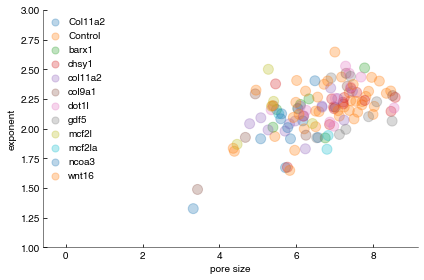

In [18]:
# plt.scatter(df['pore_size'], df['exponent'])
for c in categories:
    plt.scatter(df['pore_size'], df['exponent'], s=100*df[c], alpha=0.3, label=c)
plt.legend();
plt.xlabel('pore size')
plt.ylabel('exponent');
plt.ylim(1,3)

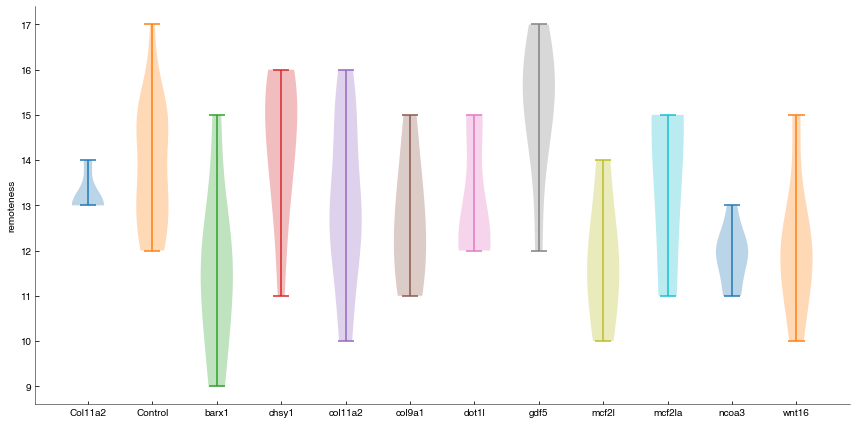

In [42]:
plt.figure(figsize=(12,6))
for i,c in enumerate(categories):
    plt.violinplot(df[df[c]==1]['remoteness'],positions=[i])
plt.gca().set_xticks(np.arange(0, len(categories)))
plt.gca().set_xticklabels(categories);
plt.ylabel('remoteness');
plt.savefig('pore_size_violin_mutant.pdf')

In [59]:
# loop over a few jaws:
remoteness = {}
picklefile = open('output/remoteness_mutant.pkl', 'ab+')
for name in list(data.keys()):
    sampler = stats.BallSampler(data[name],sigma=30)
    sampler.get_remoteness()
    print(name, sampler.avg_remoteness)
    remoteness[name] = sampler.remoteness
pickle.dump(res,picklefile)
picklefile.close()

KeyboardInterrupt: 

In [52]:
avg_rem = []
for key,value in remoteness.items():
    avg_rem.append(value.std())
df['remoteness']=avg_rem

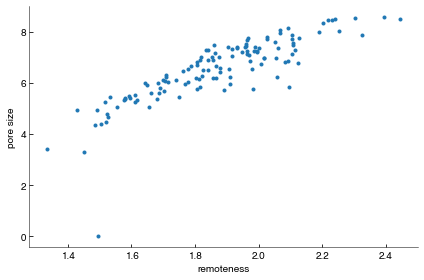

In [53]:
plt.plot(df['remoteness'], df['pore_size'],'.')
plt.xlabel('remoteness')
plt.ylabel('pore size');

In [36]:
df['pore_size'].min()

4.122851085913228e-05

In [5]:
sampler= stats.BallSampler(data['Col11a2 mutant 13'],sigma=5)

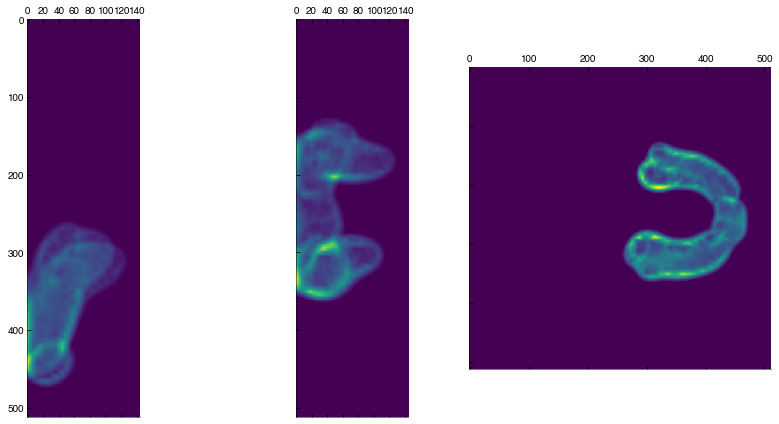

In [63]:
sampler.get_remoteness(threshold=10)
plotting.trisum(sampler.distance)

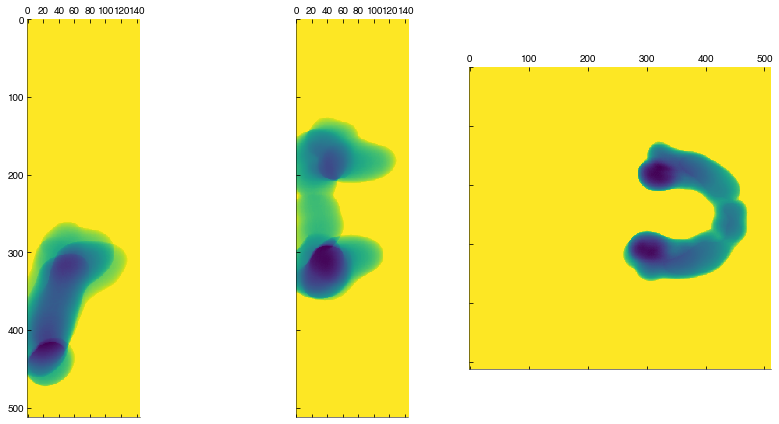

In [15]:
from scipy import ndimage 
G=ndimage.gaussian_filter(sampler.data,sigma=8)>0
# G [sampler.data>0]=0
plotting.trisum(G==0)


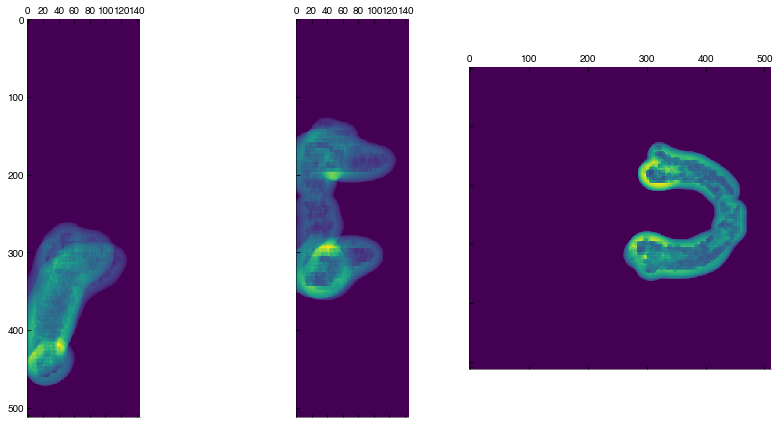

In [40]:
plotting.trisum((G.astype(int)+(sampler.data>0).astype(int))==1)

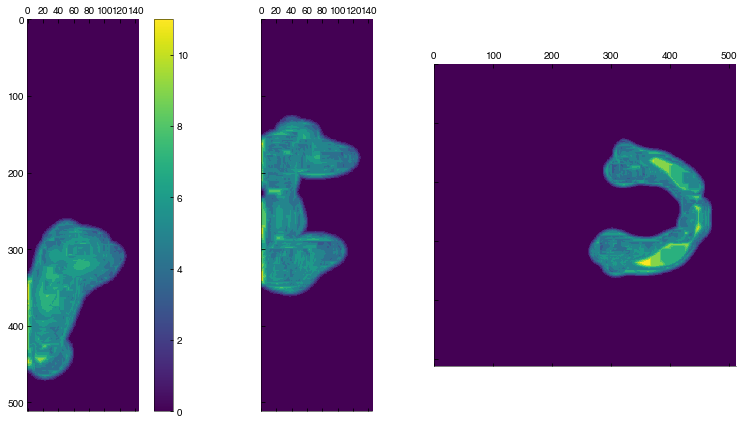

In [67]:
A = G.astype(int)+(sampler.data>0).astype(int)
AA = A
AA [A==2]=0
DD = ndimage.distance_transform_cdt(AA)
plotting.trimax(DD, colorbar=True)


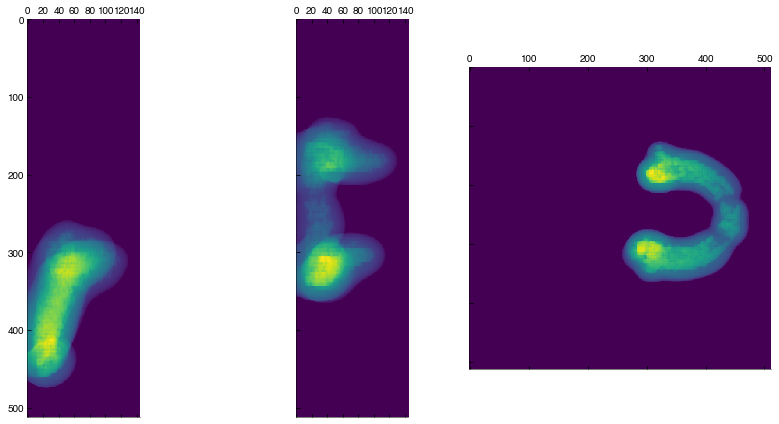

In [79]:
G=ndimage.gaussian_filter(sampler.data,sigma=10)>0


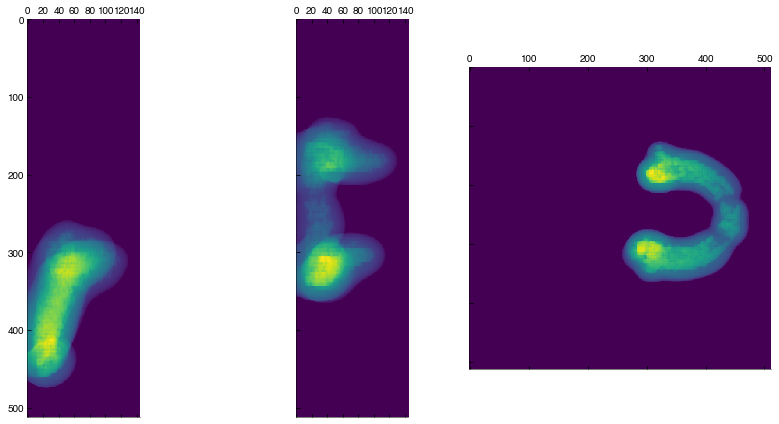

In [80]:
U = G.astype(int)+(sampler.data>0).astype(int)
# U[U==1]=0
# plotting.trimax(A)
plotting.trisum(U)

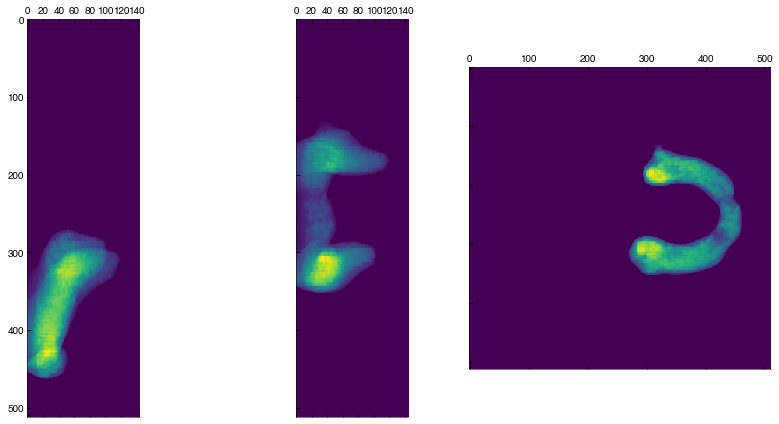

In [99]:
N = ~(U>0)
N = ndimage.binary_dilation(N,iterations=12)
H = U-N
H[H<0]=0
plotting.trisum(H)

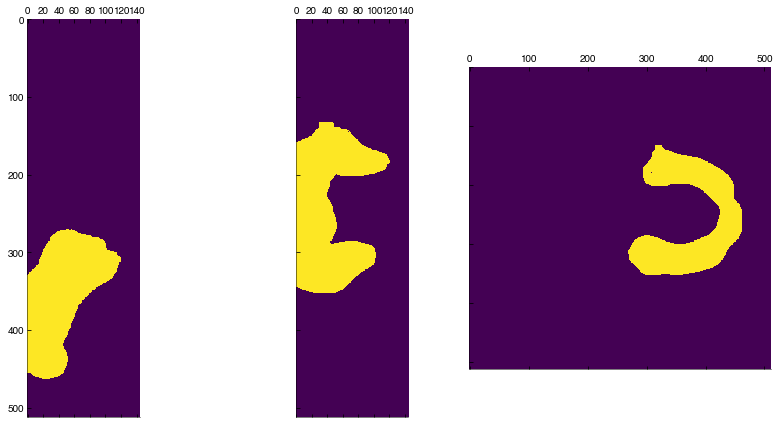

In [101]:
plotting.trimax(H==1)

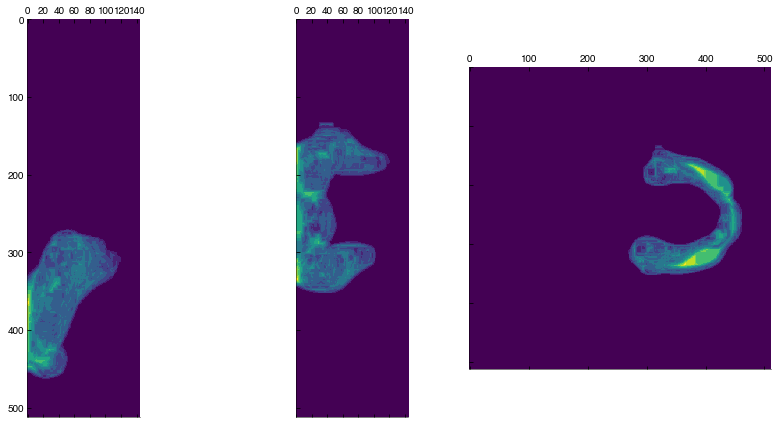

In [110]:
from copy import deepcopy
J = deepcopy(H)
J[H==2]=0
F = ndimage.distance_transform_cdt(J)
plotting.trimax(F)

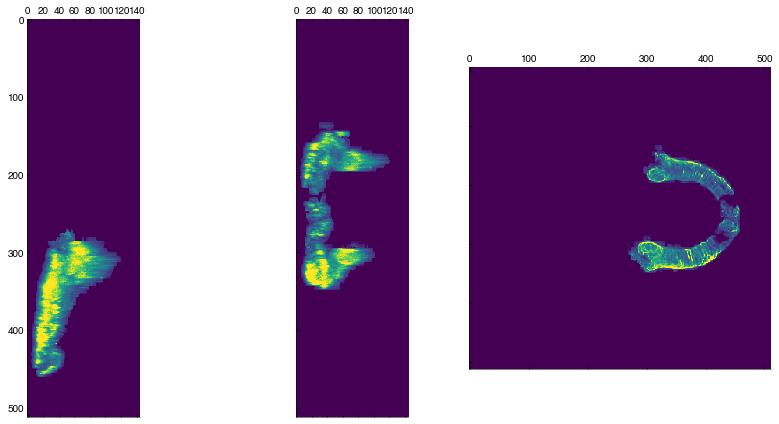

In [111]:
plotting.trimax(sampler.data)

In [73]:
from scipy import ndimage
D = ndimage.distance_transform_cdt(G)

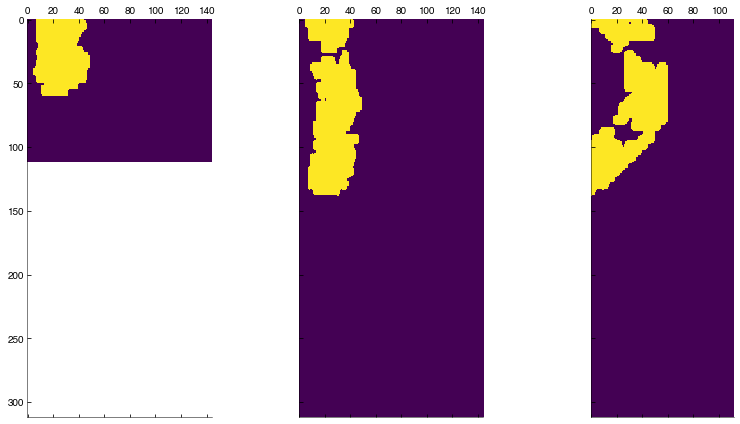

In [126]:
plotting.trimax(sampler.data[200:,400:,:300]>0)

In [2]:
from skimage.morphology import convex_hull_image

In [ ]:
plotting.trisum(CH)